In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
path=("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
data=pd.read_csv(path,header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'])
train,test = train_test_split(data,test_size=0.2,random_state=7)
#analysing data
print ("train shape:   ")
print (train.shape)
print ("test shape:    ")
print (test.shape)
print ("Unique classes with count : ")
print (pd.value_counts(train['class']))
print ("data description : ")
print (train.describe())
print (train.isnull().any())

train shape:   
(120, 5)
test shape:    
(30, 5)
Unique classes with count : 
Iris-setosa        43
Iris-virginica     39
Iris-versicolor    38
Name: class, dtype: int64
data description : 
       sepal_length  sepal_width  petal_length  petal_width
count    120.000000   120.000000    120.000000   120.000000
mean       5.833333     3.059167      3.675000     1.165833
std        0.849848     0.436274      1.804628     0.775843
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.700000     3.000000      4.150000     1.300000
75%        6.400000     3.300000      5.100000     1.825000
max        7.900000     4.400000      6.900000     2.500000
sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool


In [3]:
#checking missing values
print (train.info())
#No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 126 to 25
Data columns (total 5 columns):
sepal_length    120 non-null float64
sepal_width     120 non-null float64
petal_length    120 non-null float64
petal_width     120 non-null float64
class           120 non-null object
dtypes: float64(4), object(1)
memory usage: 5.6+ KB
None


Univariate analysis
Target Class


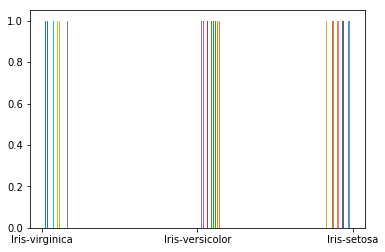

In [4]:
print ("Univariate analysis")
print ("Target Class")
plt.hist(train['class'])
plt.show()

Sepal_length


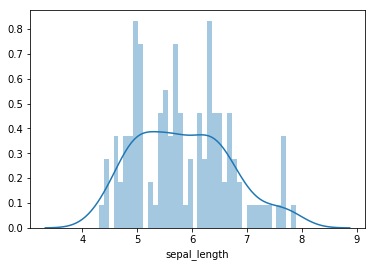

In [5]:
print ("Sepal_length")
sns.distplot(train['sepal_length'],kde=True,bins=40)
plt.show()

Sepal_width


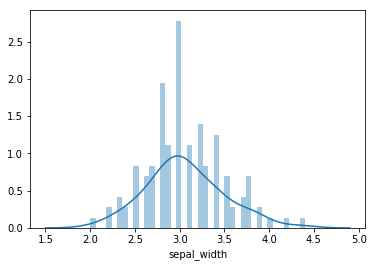

In [6]:
print ("Sepal_width")
sns.distplot(train['sepal_width'],kde=True,bins=40)
plt.show()

Petal_length


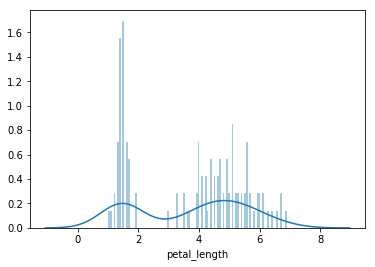

In [7]:
print ("Petal_length")
sns.distplot(train['petal_length'],kde=True,bins=100)
plt.show()

Petal_width


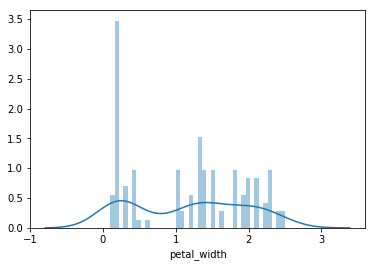

In [8]:
print ("Petal_width")
sns.distplot(train['petal_width'],kde=True,bins=40)
plt.show()

bivariate analysis


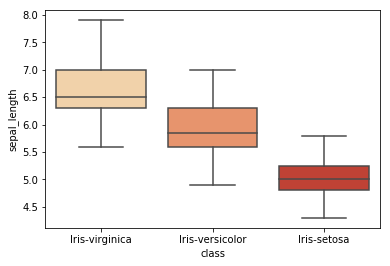

In [9]:
print ("bivariate analysis")
sns.boxplot(x='class',y='sepal_length',data=train,palette='OrRd')
plt.show()

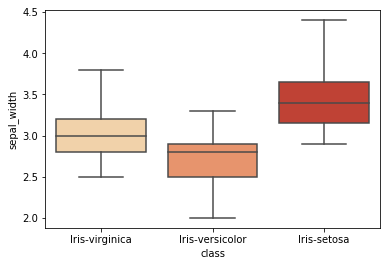

In [10]:
sns.boxplot(x='class',y='sepal_width',data=train,palette='OrRd')
plt.show()

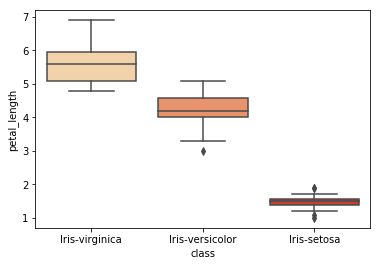

In [11]:
sns.boxplot(x='class',y='petal_length',data=train,palette='OrRd')
plt.show()

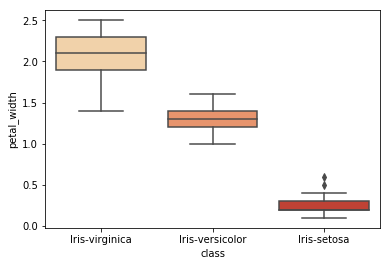

In [12]:
sns.boxplot(x='class',y='petal_width',data=train,palette='OrRd')
plt.show()

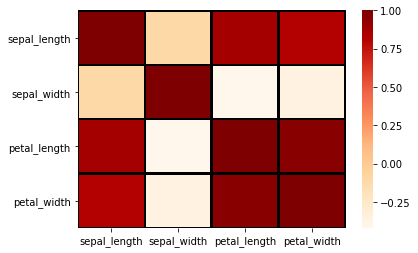

In [13]:
sns.heatmap(data.corr(),cmap="OrRd", linecolor='black', linewidths=1.5)
plt.show()

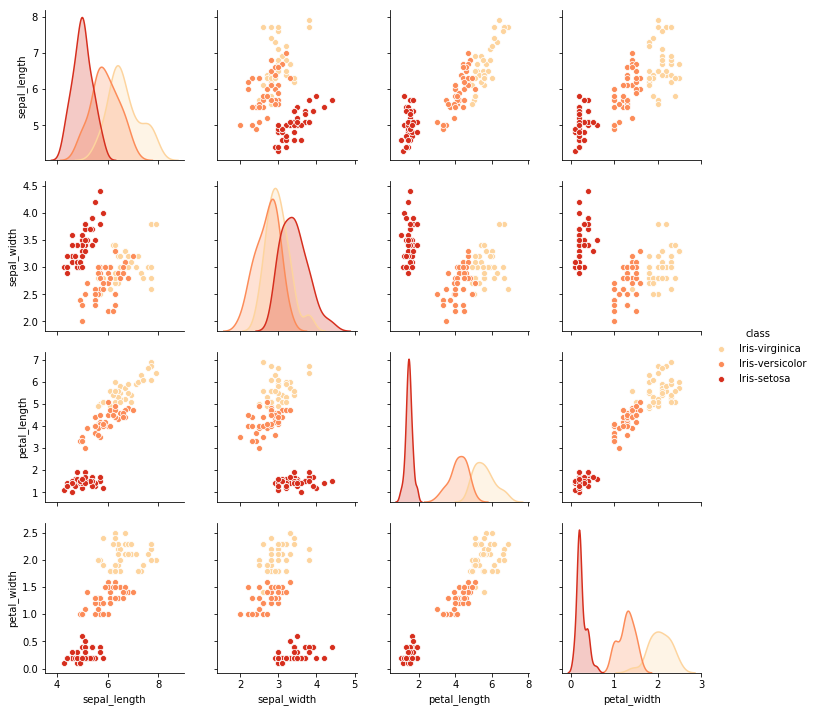

In [14]:
sns.pairplot(train, hue='class',palette='OrRd')
plt.show()

In [15]:
#Manual Encoding
'''train['class'][train['class']=='Iris-versicolor']=0
train['class'][train['class']=='Iris-setosa']=1
train['class'][train['class']=='Iris-virginica']=2
test['class'][test['class']=='Iris-versicolor']=0
test['class'][test['class']=='Iris-setosa']=1
test['class'][test['class']=='Iris-virginica']=2'''

"train['class'][train['class']=='Iris-versicolor']=0\ntrain['class'][train['class']=='Iris-setosa']=1\ntrain['class'][train['class']=='Iris-virginica']=2\ntest['class'][test['class']=='Iris-versicolor']=0\ntest['class'][test['class']=='Iris-setosa']=1\ntest['class'][test['class']=='Iris-virginica']=2"

In [16]:
train.head()
X_train=train.iloc[ : , :-1]
y_train=train.iloc[ : , -1]

In [17]:
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:,-1].values

In [18]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
y_train=Encoder.fit_transform(y_train)
y_test=Encoder.transform(y_test)

In [19]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

In [20]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
        

In [21]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

NameError: name 'X' is not defined

In [22]:
print ("SVC Performance")
SVM = SVC()
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_test)
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

SVC Performance
0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



C:\Users\Kamran Hashmi\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
print ("KNN Performance")
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

KNN Performance
0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [73]:
lr=LogisticRegression()
lr.fit(X_test,y_test)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



C:\Users\Kamran Hashmi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kamran Hashmi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [68]:
submission=X_test

In [70]:
submission = pd.DataFrame(submission)
type(submission)

pandas.core.frame.DataFrame

In [72]:
submission.head()

,0,1,2,3
0,5.9,3.0,5.1,1.8
1,5.4,3.0,4.5,1.5
2,5.0,3.5,1.3,0.3
3,5.6,3.0,4.5,1.5
4,4.9,2.5,4.5,1.7


In [74]:
submission.head()

,0,1,2,3,4
0,5.9,3.0,5.1,1.8,2
1,5.4,3.0,4.5,1.5,1
2,5.0,3.5,1.3,0.3,0
3,5.6,3.0,4.5,1.5,1
4,4.9,2.5,4.5,1.7,2


In [75]:
submission.columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class']

In [78]:
submission.to_csv('Submission.csv', index=False)